In [141]:
import pandas
import matplotlib
%matplotlib inline

In [142]:
#ok so I began again, this time with a much clearer dataset. And yes, I did this in excel. 
site_data = pandas.read_csv('site_data.csv')

In [143]:
site_data

,MOVE_ID,FACE_ID,ADEASY_CAB_ID,MONITOR_CAB_ID,Orbit_ID,ADDRESS,SUBURB,Postcode,FORMAT,CATEGORY,...,Microsoft_audience_techbuyers,Heineken_audience_beersocialisers,Bankwest_audience_mortgageintenders,Westpac_audience_homebuyers,LVMH_audience_affluenzas,Channel10_audience_Realitywatchers,VW_audience_Vwintenders,QANTAS_audience_singaporeairlineintenders,Loreal_audience_cosmeticslovers,ING_audience_investmentpropertyowners
0,23037.0,1354.0,sb1020,b1020,12023037 - Bridge St Before Gresham St,Bridge St / Before Gresham St,Sydney,2000.0,Citylight,Roadside,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
1,23038.0,1355.0,sb1020,b1020,12023038 - Bridge St Before Gresham St,Bridge St / Before Gresham St,Sydney,2000.0,Citylight,Roadside,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
2,23039.0,1356.0,sb1023,b1023,12023039 - Carrington St Before Margaret St,Carrington St / Before Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.210944,147.023259,95.207037,79.811926,252.733658,86.846973,163.474435,160.461332,127.192263,73.841441
3,23040.0,1357.0,sb1023,b1023,12023040 - Carrington St Before Margaret St,Carrington St / Before Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.317862,184.396178,94.860181,70.125701,291.290589,80.784696,187.845809,172.312758,129.546607,73.825227
4,23041.0,1358.0,sb1024,b1024,12023041 - Phillip St Before Bent St,Phillip St / Before Bent St,Sydney,2000.0,Citylight,Roadside,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
5,23042.0,1359.0,sb1024,b1024,12023042 - Phillip St Before Bent St,Phillip St / Before Bent St,Sydney,2000.0,Citylight,Roadside,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
6,23043.0,1360.0,sb1025,b1025,12023043 - York St After Margaret St,York St / After Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.189263,146.998522,95.245027,79.841587,252.608146,86.858024,163.458944,160.478946,127.224298,73.848955
7,23044.0,1361.0,sb1025,b1025,12023044 - York St After Margaret St,York St / After Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.266518,184.274403,94.856100,70.211054,291.037403,80.793914,187.983993,172.364876,129.543087,73.859737
8,23045.0,1362.0,sb1026,b1026,12023045 - Carrington St Before Margaret St,Carrington St / Before Margaret St,Sydney,2000.0,Citylight,Roadside,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205
9,23046.0,1363.0,sb1026,b1026,12023046 - Carrington St Before Margaret St,Carrington St / Before Margaret St,Sydney,2000.0,Citylight,Roadside,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205


In [144]:
#did some basic understanding of what the data was (so I would be able to cluster etc etc)
site_data.dtypes

MOVE_ID                                      float64
FACE_ID                                      float64
ADEASY_CAB_ID                                 object
MONITOR_CAB_ID                                object
Orbit_ID                                      object
ADDRESS                                       object
SUBURB                                        object
Postcode                                     float64
FORMAT                                        object
CATEGORY                                      object
MARKET                                        object
COUNCIL                                       object
Face_type                                     object
Longitude                                    float64
Latitude                                     float64
Reach/100                                    float64
reach_7_total                                float64
reach_14_total                               float64
reach_21_total                               f

In [165]:
#I noticed there were heaps of NaNs, so dropped them 
#(waaay more data cleansing than i wanted... wait till you see below!)
site_data_cleaned = site_data.dropna()
site_data_cleaned

,MOVE_ID,FACE_ID,ADEASY_CAB_ID,MONITOR_CAB_ID,Orbit_ID,ADDRESS,SUBURB,Postcode,FORMAT,CATEGORY,...,Microsoft_audience_techbuyers,Heineken_audience_beersocialisers,Bankwest_audience_mortgageintenders,Westpac_audience_homebuyers,LVMH_audience_affluenzas,Channel10_audience_Realitywatchers,VW_audience_Vwintenders,QANTAS_audience_singaporeairlineintenders,Loreal_audience_cosmeticslovers,ING_audience_investmentpropertyowners
0,23037.0,1354.0,sb1020,b1020,12023037 - Bridge St Before Gresham St,Bridge St / Before Gresham St,Sydney,2000.0,Citylight,Roadside,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
1,23038.0,1355.0,sb1020,b1020,12023038 - Bridge St Before Gresham St,Bridge St / Before Gresham St,Sydney,2000.0,Citylight,Roadside,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
2,23039.0,1356.0,sb1023,b1023,12023039 - Carrington St Before Margaret St,Carrington St / Before Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.210944,147.023259,95.207037,79.811926,252.733658,86.846973,163.474435,160.461332,127.192263,73.841441
3,23040.0,1357.0,sb1023,b1023,12023040 - Carrington St Before Margaret St,Carrington St / Before Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.317862,184.396178,94.860181,70.125701,291.290589,80.784696,187.845809,172.312758,129.546607,73.825227
4,23041.0,1358.0,sb1024,b1024,12023041 - Phillip St Before Bent St,Phillip St / Before Bent St,Sydney,2000.0,Citylight,Roadside,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
5,23042.0,1359.0,sb1024,b1024,12023042 - Phillip St Before Bent St,Phillip St / Before Bent St,Sydney,2000.0,Citylight,Roadside,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
6,23043.0,1360.0,sb1025,b1025,12023043 - York St After Margaret St,York St / After Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.189263,146.998522,95.245027,79.841587,252.608146,86.858024,163.458944,160.478946,127.224298,73.848955
7,23044.0,1361.0,sb1025,b1025,12023044 - York St After Margaret St,York St / After Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.266518,184.274403,94.856100,70.211054,291.037403,80.793914,187.983993,172.364876,129.543087,73.859737
8,23045.0,1362.0,sb1026,b1026,12023045 - Carrington St Before Margaret St,Carrington St / Before Margaret St,Sydney,2000.0,Citylight,Roadside,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205
9,23046.0,1363.0,sb1026,b1026,12023046 - Carrington St Before Margaret St,Carrington St / Before Margaret St,Sydney,2000.0,Citylight,Roadside,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205


In [159]:
#did ANOTHER regression, Theilsen again... because I'm trying to predict a NUMBER right?
import sklearn.linear_model

In [160]:
regressor = sklearn.linear_model.TheilSenRegressor()


In [172]:
X = site_data_cleaned [  ["Stan_audience_streamers",'Microsoft_audience_techbuyers', 
                          'Heineken_audience_beersocialisers', 'Westpac_audience_homebuyers'] ]
y = site_data_cleaned.panel_rate_standard

In [173]:
regressor.fit(X,y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [175]:
#ok so we were getting somewhere... but was it a valid model???
#and I couldn't get the predictors to work
regressor.predict([ ['Stan_audience_streamers'], ['panel_rate_standard']  ])

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

In [ ]:
#what does that even mean? Well, let's assume that Thielsen MAY NOT be the best option... or I'm doing
#this wrong (either option would be true haha!!)
#so let's try a different Linear Regression approach...

In [176]:
ols_site_data = sklearn.linear_model.LinearRegression()


In [177]:
X = site_data_cleaned [  ["Stan_audience_streamers",'Microsoft_audience_techbuyers', 
                          'Heineken_audience_beersocialisers', 'Westpac_audience_homebuyers'] ]
y = site_data_cleaned.panel_rate_standard

In [178]:
ols_site_data.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
ols_site_data.coef_

array([ 0.,  0.,  0.,  0.])

In [180]:
#WTF????
ols_site_data.intercept_

323.0

In [181]:
["%.2f" % (c,) for c in ols_site_data.coef_]

['0.00', '0.00', '0.00', '0.00']

In [ ]:
#WTF x2????

In [182]:
predictions = ols_site_data.predict(X)
predictions

array([ 323.,  323.,  323., ...,  323.,  323.,  323.])

In [ ]:
#getting absolutely f#ck ALL!

In [183]:
#ok, let's try something else COMPLETELY!
#let's make a clusterf#ck

In [ ]:
import sklearn.cluster

In [ ]:
#I then got an error message when trying to cluster regarding the object type columns, so here's a 
#carcrash of me trying to clean that dataframe and then giving up and re-importing another version!

In [146]:
#site_data_version2 = site_data_cleaned [0]
var1 = site_data_cleaned.iloc[:,[0,1,7]]
var2 = site_data_cleaned.iloc[:,13:27]
var3 = site_data_cleaned.iloc[:,31:42]
#merge the three arrays above into one

In [147]:
import numpy as np

In [148]:
site_data_floats = np.concatenate ((var1,var2,var3))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [149]:
import scipy

In [150]:
site_data_floats2 = scipy.sparse.hstack(var1,var2,var3)

ValueError: cannot copy sequence with size 2472 to array axis with dimension 3

In [151]:
site_data_argh = np.hstack((var1,var2,var3))
site_data_argh

array([[  2.30370000e+04,   1.35400000e+03,   2.00000000e+03, ...,
          1.64513886e+02,   1.60914182e+02,   1.27415471e+02],
       [  2.30380000e+04,   1.35500000e+03,   2.00000000e+03, ...,
          1.64513886e+02,   1.60914182e+02,   1.27415471e+02],
       [  2.30390000e+04,   1.35600000e+03,   2.00000000e+03, ...,
          1.63474435e+02,   1.60461332e+02,   1.27192263e+02],
       ..., 
       [  1.44500000e+05,   1.72440000e+04,   2.00000000e+03, ...,
          1.63329909e+02,   1.60417010e+02,   1.27127398e+02],
       [  1.44501000e+05,   1.72450000e+04,   2.00000000e+03, ...,
          1.87413416e+02,   1.71982970e+02,   1.29354724e+02],
       [  1.44502000e+05,   1.72460000e+04,   2.00000000e+03, ...,
          1.63329909e+02,   1.60417010e+02,   1.27127398e+02]])

In [187]:
var2 = var2.reshape((-1,3))
site_data_argh2 = pd.DataFrame({'var1':px2[:,0],'var2':px2[:,1],'var3':px2[:,2]})

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [186]:
site_data_finally = pandas.read_csv ('clustering database.csv')
site_data_finally

,MOVE ID,Face ID,Lattitude,Longitude,Reach/100,reach_7_total,reach_14_total,reach_21_total,reach_28_total,avg_frequency_7_total,...,Microsoft_audience_techbuyers,Heineken_audience_beersocialisers,Bankwest_audience_mortgageintenders,Westpac_audience_homebuyers,LVMH_audience_affluenzas,Channel10_audience_Realitywatchers,VW_audience_Vwintenders,QANTAS_audience_singaporeairlineintenders,Loreal_audience_cosmeticslovers,ING_audience_investmentpropertyowners
0,23037.0,1354.0,151.209716,-33.863614,0.0,160.0,205.0,233.0,254.0,2.0,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
1,23038.0,1355.0,151.209716,-33.863614,0.0,292.0,374.0,425.0,463.0,3.0,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
2,23039.0,1356.0,151.206306,-33.865823,0.0,111.0,145.0,166.0,181.0,3.0,...,101.210944,147.023259,95.207037,79.811926,252.733658,86.846973,163.474435,160.461332,127.192263,73.841441
3,23040.0,1357.0,151.206306,-33.865823,0.0,55.0,73.0,85.0,93.0,1.0,...,101.317862,184.396178,94.860181,70.125701,291.290589,80.784696,187.845809,172.312758,129.546607,73.825227
4,23041.0,1358.0,151.211353,-33.865371,0.0,97.0,124.0,141.0,153.0,2.0,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
5,23042.0,1359.0,151.211353,-33.865371,0.0,85.0,113.0,130.0,143.0,3.0,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
6,23043.0,1360.0,151.205719,-33.865382,0.0,586.0,741.0,831.0,899.0,3.0,...,101.189263,146.998522,95.245027,79.841587,252.608146,86.858024,163.458944,160.478946,127.224298,73.848955
7,23044.0,1361.0,151.205719,-33.865382,0.0,38.0,50.0,56.0,62.0,2.0,...,101.266518,184.274403,94.856100,70.211054,291.037403,80.793914,187.983993,172.364876,129.543087,73.859737
8,23045.0,1362.0,151.206365,-33.865244,0.0,279.0,352.0,396.0,430.0,3.0,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205
9,23046.0,1363.0,151.206365,-33.865244,0.0,240.0,333.0,388.0,428.0,2.0,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205


In [185]:
site_data_finally.dtypes

MOVE ID                                      float64
Face ID                                      float64
Lattitude                                    float64
Longitude                                    float64
Reach/100                                    float64
reach_7_total                                float64
reach_14_total                               float64
reach_21_total                               float64
reach_28_total                               float64
avg_frequency_7_total                        float64
contacts_7_total                             float64
reach_7_pedestrian                           float64
avg_frequency_7_pedestrian                   float64
contacts_7_pedestrian                        float64
% Pedestrians contacts                       float64
daily_contacts_lts                           float64
daily_contacts_ots                           float64
effective_vi                                 float64
Adeasy                                        

In [155]:
del site_data_finally ['Adeasy']

In [156]:
site_data_finally.dtypes

MOVE ID                                      float64
Face ID                                      float64
Lattitude                                    float64
Longitude                                    float64
Reach/100                                    float64
reach_7_total                                float64
reach_14_total                               float64
reach_21_total                               float64
reach_28_total                               float64
avg_frequency_7_total                        float64
contacts_7_total                             float64
reach_7_pedestrian                           float64
avg_frequency_7_pedestrian                   float64
contacts_7_pedestrian                        float64
% Pedestrians contacts                       float64
daily_contacts_lts                           float64
daily_contacts_ots                           float64
effective_vi                                 float64
panel_rate_standard                          f

In [157]:
import matplotlib.pyplot

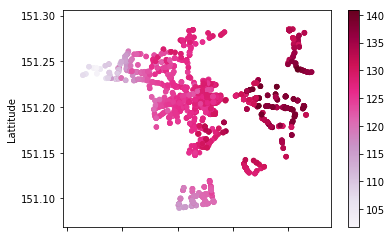

In [158]:
site_data_finally.plot.scatter('Longitude', 'Lattitude', c=site_data_finally.Loreal_audience_cosmeticslovers,
                        colormap=matplotlib.pyplot.cm.PuRd)

In [188]:
site_data_finally = site_data_finally.dropna()
site_data_finally

,MOVE ID,Face ID,Lattitude,Longitude,Reach/100,reach_7_total,reach_14_total,reach_21_total,reach_28_total,avg_frequency_7_total,...,Microsoft_audience_techbuyers,Heineken_audience_beersocialisers,Bankwest_audience_mortgageintenders,Westpac_audience_homebuyers,LVMH_audience_affluenzas,Channel10_audience_Realitywatchers,VW_audience_Vwintenders,QANTAS_audience_singaporeairlineintenders,Loreal_audience_cosmeticslovers,ING_audience_investmentpropertyowners
0,23037.0,1354.0,151.209716,-33.863614,0.0,160.0,205.0,233.0,254.0,2.0,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
1,23038.0,1355.0,151.209716,-33.863614,0.0,292.0,374.0,425.0,463.0,3.0,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
2,23039.0,1356.0,151.206306,-33.865823,0.0,111.0,145.0,166.0,181.0,3.0,...,101.210944,147.023259,95.207037,79.811926,252.733658,86.846973,163.474435,160.461332,127.192263,73.841441
3,23040.0,1357.0,151.206306,-33.865823,0.0,55.0,73.0,85.0,93.0,1.0,...,101.317862,184.396178,94.860181,70.125701,291.290589,80.784696,187.845809,172.312758,129.546607,73.825227
4,23041.0,1358.0,151.211353,-33.865371,0.0,97.0,124.0,141.0,153.0,2.0,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
5,23042.0,1359.0,151.211353,-33.865371,0.0,85.0,113.0,130.0,143.0,3.0,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
6,23043.0,1360.0,151.205719,-33.865382,0.0,586.0,741.0,831.0,899.0,3.0,...,101.189263,146.998522,95.245027,79.841587,252.608146,86.858024,163.458944,160.478946,127.224298,73.848955
7,23044.0,1361.0,151.205719,-33.865382,0.0,38.0,50.0,56.0,62.0,2.0,...,101.266518,184.274403,94.856100,70.211054,291.037403,80.793914,187.983993,172.364876,129.543087,73.859737
8,23045.0,1362.0,151.206365,-33.865244,0.0,279.0,352.0,396.0,430.0,3.0,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205
9,23046.0,1363.0,151.206365,-33.865244,0.0,240.0,333.0,388.0,428.0,2.0,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205


In [189]:
#but my clustering still didn't work!
import sklearn.cluster

In [192]:
site_data_finally = sklearn.cluster.KMeans(n_clusters=2)

In [193]:
site_cluster_suggestions = site_data_finally.fit_predict(site_data_finally)
site_cluster_suggestions

TypeError: float() argument must be a string or a number, not 'KMeans'

In [194]:
#ok, I'm about to throw my computer out the WINDOW
#let's try nearest neighbours...
site_data_cleaned

,MOVE_ID,FACE_ID,ADEASY_CAB_ID,MONITOR_CAB_ID,Orbit_ID,ADDRESS,SUBURB,Postcode,FORMAT,CATEGORY,...,Microsoft_audience_techbuyers,Heineken_audience_beersocialisers,Bankwest_audience_mortgageintenders,Westpac_audience_homebuyers,LVMH_audience_affluenzas,Channel10_audience_Realitywatchers,VW_audience_Vwintenders,QANTAS_audience_singaporeairlineintenders,Loreal_audience_cosmeticslovers,ING_audience_investmentpropertyowners
0,23037.0,1354.0,sb1020,b1020,12023037 - Bridge St Before Gresham St,Bridge St / Before Gresham St,Sydney,2000.0,Citylight,Roadside,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
1,23038.0,1355.0,sb1020,b1020,12023038 - Bridge St Before Gresham St,Bridge St / Before Gresham St,Sydney,2000.0,Citylight,Roadside,...,101.357839,148.057701,94.941543,79.730969,255.223859,86.634630,164.513886,160.914182,127.415471,74.013377
2,23039.0,1356.0,sb1023,b1023,12023039 - Carrington St Before Margaret St,Carrington St / Before Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.210944,147.023259,95.207037,79.811926,252.733658,86.846973,163.474435,160.461332,127.192263,73.841441
3,23040.0,1357.0,sb1023,b1023,12023040 - Carrington St Before Margaret St,Carrington St / Before Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.317862,184.396178,94.860181,70.125701,291.290589,80.784696,187.845809,172.312758,129.546607,73.825227
4,23041.0,1358.0,sb1024,b1024,12023041 - Phillip St Before Bent St,Phillip St / Before Bent St,Sydney,2000.0,Citylight,Roadside,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
5,23042.0,1359.0,sb1024,b1024,12023042 - Phillip St Before Bent St,Phillip St / Before Bent St,Sydney,2000.0,Citylight,Roadside,...,101.352348,147.821635,94.843503,79.739553,255.348665,86.618427,163.955956,161.475917,127.063311,74.039638
6,23043.0,1360.0,sb1025,b1025,12023043 - York St After Margaret St,York St / After Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.189263,146.998522,95.245027,79.841587,252.608146,86.858024,163.458944,160.478946,127.224298,73.848955
7,23044.0,1361.0,sb1025,b1025,12023044 - York St After Margaret St,York St / After Margaret Street,Sydney,2000.0,Citylight,Roadside,...,101.266518,184.274403,94.856100,70.211054,291.037403,80.793914,187.983993,172.364876,129.543087,73.859737
8,23045.0,1362.0,sb1026,b1026,12023045 - Carrington St Before Margaret St,Carrington St / Before Margaret St,Sydney,2000.0,Citylight,Roadside,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205
9,23046.0,1363.0,sb1026,b1026,12023046 - Carrington St Before Margaret St,Carrington St / Before Margaret St,Sydney,2000.0,Citylight,Roadside,...,101.224214,147.154730,95.200864,79.836933,252.860515,86.819135,163.643469,160.502877,127.225454,73.826205


In [196]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(site_data_cleaned[['Bankwest_audience_mortgageintenders', 
                           'LVMH_audience_affluenzas', 'VW_audience_Vwintenders']], 
        site_data_cleaned.panel_rate_standard)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
#WHAAAAT!!! IS SOMETHING WORKING????

In [197]:
knn.predict( [ [1, 1.0, 0  ]])

array([ 323.])

In [ ]:
#hold on... I know what's wrong now! I'm trying to bloody well predict something using the answer already!
#so where to now????